# EPUSP - Random Circuit generator - v.3.2024

Passo 1 - Gerando circuito aleatório, para execução em simulador sem ruídos.

In [1]:
from qiskit import IBMQ, transpile, QuantumCircuit, Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.random import random_circuit

circ = random_circuit(3, 3, 3, measure=True, conditional=False, reset=False, seed=0)
circ.draw()

┌───┐               ┌─────┐     ┌─┐      
q_0: ───────┤ I ├─────────■─────┤ Tdg ├─────┤M├──────
            ├───┤         │ ┌───┴─────┴────┐└╥┘┌─┐   
q_1: ───────┤ I ├─────────X─┤ Rx(0.017207) ├─╫─┤M├───
     ┌──────┴───┴───────┐ │ ├─────────────┬┘ ║ └╥┘┌─┐
q_2: ┤ U2(5.735,3.8116) ├─X─┤ Rx(0.21102) ├──╫──╫─┤M├
     └──────────────────┘   └─────────────┘  ║  ║ └╥┘
c: 3/════════════════════════════════════════╩══╩══╩═
                                             0  1  2

In [2]:
circ = random_circuit(3, 3, 3, measure=True, conditional=False, reset=False, seed=0)
circ.draw()

┌───┐               ┌─────┐     ┌─┐      
q_0: ───────┤ I ├─────────■─────┤ Tdg ├─────┤M├──────
            ├───┤         │ ┌───┴─────┴────┐└╥┘┌─┐   
q_1: ───────┤ I ├─────────X─┤ Rx(0.017207) ├─╫─┤M├───
     ┌──────┴───┴───────┐ │ ├─────────────┬┘ ║ └╥┘┌─┐
q_2: ┤ U2(5.735,3.8116) ├─X─┤ Rx(0.21102) ├──╫──╫─┤M├
     └──────────────────┘   └─────────────┘  ║  ║ └╥┘
c: 3/════════════════════════════════════════╩══╩══╩═
                                             0  1  2

In [3]:
# You can choose other backend also.
ideal_backend = Aer.get_backend("qasm_simulator")

In [4]:
from qiskit import transpile

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circ, ideal_backend)
transpiled_circuit.draw()

┌─────┐     ┌─┐      
q_0: ─────────────────────■─────┤ Tdg ├─────┤M├──────
                          │ ┌───┴─────┴────┐└╥┘┌─┐   
q_1: ─────────────────────X─┤ Rx(0.017207) ├─╫─┤M├───
     ┌──────────────────┐ │ ├─────────────┬┘ ║ └╥┘┌─┐
q_2: ┤ U2(5.735,3.8116) ├─X─┤ Rx(0.21102) ├──╫──╫─┤M├
     └──────────────────┘   └─────────────┘  ║  ║ └╥┘
c: 3/════════════════════════════════════════╩══╩══╩═
                                             0  1  2

In [5]:
#backend = Aer.get_backend('aer_simulator')
ideal_result = ideal_backend.run(transpiled_circuit).result()
ideal_counts = ideal_result.get_counts() 

print(ideal_result)

Result(backend_name='qasm_simulator', backend_version='0.11.0', qobj_id='ff7860f1-044f-496e-8223-c7374eef9937', job_id='c7b42331-a4d3-46da-bda5-851489021e1c', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 441, '0x4': 583}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-78', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=1238459742, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 3, 'num_clbits': 3, 'sample_measure_time': 0.0010399, 'input_qubit_map': [[0, 0], [1, 1], [2, 2]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qubits'

In [6]:
print(ideal_counts)

{'000': 441, '100': 583}


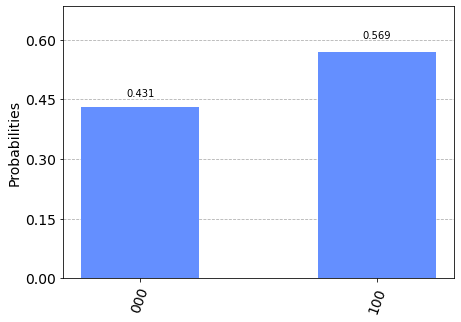

In [7]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(ideal_counts)

# Fase 2 - Random 1 Circuit rodando em Fake provider com erros

Passo 2 - Gerando circuito aleatório, para execução em simulador fake com ruídos.

Please note that the simulation is done using a noise model generated from system snapshots obtained in the past (sometimes a few years ago) and the results are not representative of the latest behaviours of the real quantum system which the fake backend is mimicking. If you want to run noisy simulations to compare with the real quantum system, please follow steps below to generate a simulator mimics a real quantum system with the latest calibration results.

Ref.: https://qiskit.org/documentation/apidoc/providers_fake_provider.html
Ref.: https://qiskit.org/documentation/stubs/qiskit.circuit.random.random_circuit.html


In [9]:
from qiskit.providers.fake_provider import FakeManilaV2
noise_backend = FakeManilaV2()

In [10]:
from qiskit import transpile

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circ, noise_backend)
transpiled_circuit.draw()

global phase: 2.4171
                                                                         »
ancilla_0 -> 0 ──────────────────────────────────────────────────────────»
                                                                         »
ancilla_1 -> 1 ──────────────────────────────────────────────────────────»
                                                                         »
      q_0 -> 2 ──────────────────────────────────────────────────────────»
                                                                    ┌───┐»
      q_1 -> 3 ─────────────────────────────────────────────────────┤ X ├»
               ┌──────────────────────┐┌────┐┌─────────────────────┐└─┬─┘»
      q_2 -> 4 ┤ Rz(2.24080866631494) ├┤ √X ├┤ Rz(7.3058087589925) ├──■──»
               └──────────────────────┘└────┘└─────────────────────┘     »
          c: 3/══════════════════════════════════════════════════════════»
                                                                         »
«                                                                           »
«ancilla_0 -> 0 ────────────────────────────────────────────────────────────»
«                                                                           »
«ancilla_1 -> 1 ────────────────────────────────────────────────────────────»
«                                                            ┌───┐          »
«      q_0 -> 2 ──────────────────────────────────────■──────┤ X ├──■───────»
«                                                   ┌─┴─┐    └─┬─┘┌─┴─┐     »
«      q_1 -> 3 ──────────────────────────────■─────┤ X ├──────■──┤ X ├──■──»
«               ┌─────────┐┌────┐┌─────────┐┌─┴─┐┌──┴───┴───┐     └───┘┌─┴─┐»
«      q_2 -> 4 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├──────────┤ X ├»
«               └─────────┘└────┘└─────────┘└───┘└──────────┘          └───┘»
«          c: 3/════════════════════════════════════════════════════════════»
«                                                                           »
«                                                                              »
«ancilla_0 -> 0 ───────────────────────────────────────────────────────────────»
«                                                                              »
«ancilla_1 -> 1 ───────────────────────────────────────────────────────────────»
«                          ┌───┐                                               »
«      q_0 -> 2 ─────■─────┤ X ├──■────────────────────────────────────■───────»
«                  ┌─┴─┐   └─┬─┘┌─┴─┐     ┌─────────┐ ┌───┐     ┌───┐┌─┴─┐┌───┐»
«      q_1 -> 3 ───┤ X ├─────■──┤ X ├──■──┤ Rz(π/4) ├─┤ X ├──■──┤ X ├┤ X ├┤ X ├»
«               ┌──┴───┴──┐     └───┘┌─┴─┐├─────────┴┐└─┬─┘┌─┴─┐└─┬─┘└───┘└─┬─┘»
«      q_2 -> 4 ┤ Rz(π/4) ├──────────┤ X ├┤ Rz(-π/4) ├──■──┤ X ├──■─────────■──»
«               └─────────┘          └───┘└──────────┘     └───┘               »
«          c: 3/═══════════════════════════════════════════════════════════════»
«                                                                              »
«                                                                        »
«ancilla_0 -> 0 ─────────────────────────────────────────────────────────»
«                                                                        »
«ancilla_1 -> 1 ─────────────────────────────────────────────────────────»
«                                     ┌─────────┐            ┌──────────┐»
«      q_0 -> 2 ───────────────■──────┤ Rz(π/4) ├──────■─────┤ Rz(-π/4) ├»
«                    ┌───┐   ┌─┴─┐    ├─────────┴┐   ┌─┴─┐   └──┬───┬───┘»
«      q_1 -> 3 ──■──┤ X ├───┤ X ├────┤ Rz(-π/4) ├───┤ X ├──────┤ X ├────»
«               ┌─┴─┐└─┬─┘┌──┴───┴───┐└──┬────┬──┘┌──┴───┴──┐   └─┬─┘    »
«      q_2 -> 4 ┤ X ├──■──┤ Rz(3π/4) ├───┤ √X ├───┤ Rz(π/2) ├─────■──────»
«               └───┘     └──────────┘   └────┘   └─────────┘            »
«          c: 3/═════════════════════════════════════════════════════════»
«                                    

In [11]:
# Run the transpiled circuit using the simulated fake backend
noise_result = noise_backend.run(transpiled_circuit).result()
noise_counts = noise_result.get_counts() 

print(noise_result)

Result(backend_name='aer_simulator', backend_version='0.11.0', qobj_id='3d627096-7ceb-41c0-86a1-e1a23411cd32', job_id='67184aa4-98f6-4643-9fc9-6f958e8eec00', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x4': 480, '0x0': 424, '0x2': 34, '0x6': 59, '0x1': 11, '0x5': 9, '0x3': 5, '0x7': 2}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], global_phase=2.4171142224613718, memory_slots=3, metadata={}, n_qubits=5, name='circuit-79', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), status=DONE, seed_simulator=2736635467, metadata={'batched_shots_optimization': False, 'method': 'density_matrix', 'active_input_qubits': [2, 3, 4], 'device': 'CPU', 'remapped_qubits': True, 'num_qubits': 3, 'num_clbits': 3, 'sample_measure_time': 0.0005353, 'input_qubit_map': [[2, 0], [3, 1], [4, 2]], 'measure_sampling': True, 'noise': 'superop', 'parallel_s

In [12]:
print(noise_counts)

{'100': 480, '000': 424, '010': 34, '110': 59, '001': 11, '101': 9, '011': 5, '111': 2}


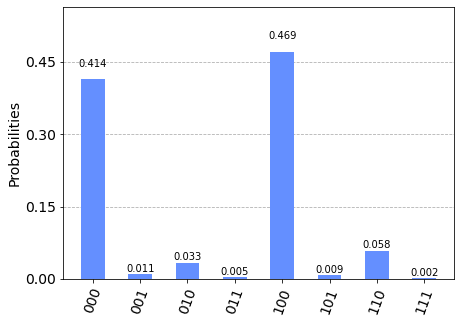

In [13]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(noise_counts)

In [14]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright